In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

2023-05-07 14:21:55.107404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 14:21:57.678271: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
)

In [3]:
trainer = Trainer(
    diffusion,
    '../data/all-dogs-cropped-unravelled/',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 12000,            # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = False,                       # turn on mixed precision
    calculate_fid = False              # whether to calculate fid during training
)

In [11]:
trainer.load("5")

loading from version 1.5.6


In [12]:
trainer.train()

 75%|#######5  | 9000/12000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

training complete


In [5]:
def show(img):
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
    plt.show()

In [12]:
sampled_images = diffusion.sample(batch_size = 4)

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

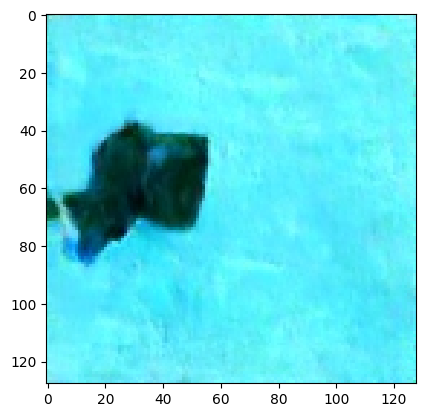

In [13]:
show(sampled_images[0])

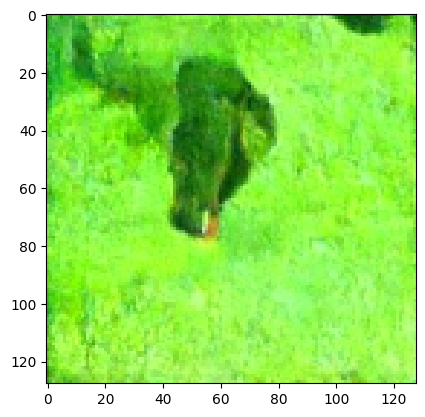

In [14]:
show(sampled_images[1])

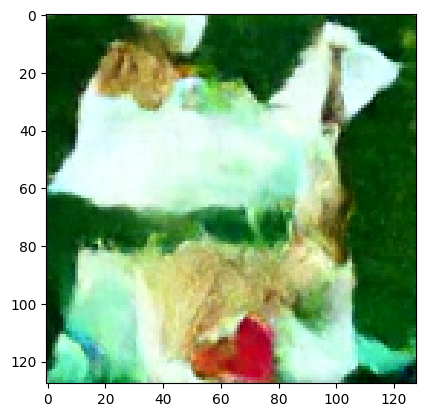

In [15]:
show(sampled_images[2])

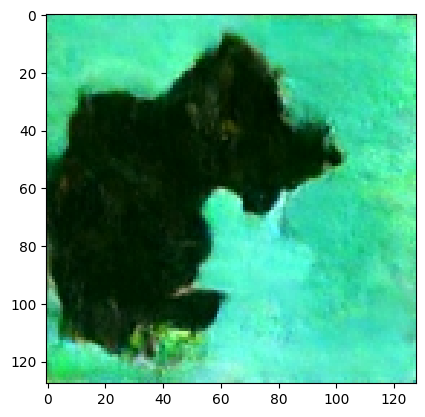

In [16]:
show(sampled_images[3])